In [1]:
%matplotlib notebook
%pylab
from scipy.integrate import quad
from scipy.special import erf

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# No6

Solve 
\begin{equation}
 u^{"}(x) = e^{-100(x-0.5)^2}
\end{equation}

Use boundary conditions $u(0) = u(1) = 0$. Evaluate your solution at $xj = jh,j = 0,1,...,N,$ for $h = 1/N$ and $N = 16.$

In [2]:
N = 16
a = 0; b = 1
h = 1/N 

x = zeros(N+1)
I = zeros(N+1)

#rhs
def f(x):
    return exp(-100*(x-0.5)**2)

#Green's function
def G(x,y):
    if 0 <= x <= y:
        return (y-1)*x
    elif y <= x <= 1:
        return y*(x-1)

#Qudrature Rule
for j in range(N+1):
    x[j] = j*h
    xj = x[j]
    Gf = lambda y: G(xj,y)*f(y)
    I[j] =  quad(Gf,a,b)[0]   

 Compare your solution to the exact solution, which you can obtain by using WolframAlpha to evaluate the integral form of the solution in (5)

In [3]:
def wolfram(x):
    
    w1 = (x-1)*(-(1/40)*sqrt(pi)*erf(5-10*x)-(1/200)*exp(-25*(1-2*x)**2)) - \
    (x-1)*(-(1/40)*sqrt(pi)*erf(5)-(1/200)*exp(-25))
    
    w2 = x*((1/40)*sqrt(pi)*erf(-5)-(1/200)*exp(-25))- \
    (x*((1/40)*sqrt(pi)*erf(5-10*x)-(1/200)*exp(-25*(1-2*x)**2)))
    
    return w1, w2

w1,w2 = wolfram(x)
wolf_exact = w1 + w2

In [4]:
error = abs(wolf_exact[1:-1]-I[1:-1])
print('Error between Wolfram solution and the intergral solution is:',max(error))
print('\n The error is too small, hence the solution is well approximated.')

Error between Wolfram solution and the intergral solution is: 3.0852900477496004e-09

 The error is too small, hence the solution is well approximated.


Compare the solution to the finite difference solution obtained in class.

In [5]:
#Using Finite Difference
f = f(x[1:-1])

# Construct A and compute inv(A)
z = ones(N-1)
A = (diag(z[:-1],-1) -2*diag(z) + diag(z[:-1],1))/h**2
Ainv = inv(A)
u = solve(A,f)

In [6]:
error = abs(u-I[1:-1])
print('Error between Quadrature solution and the intergral solution is:',max(error))
print('\n The error is too small, hence the solution is well approximated, but not better than the wolfram solution.')

Error between Quadrature solution and the intergral solution is: 0.0003396181193379699

 The error is too small, hence the solution is well approximated, but not better than the wolfram solution.


<IPython.core.display.Javascript object>


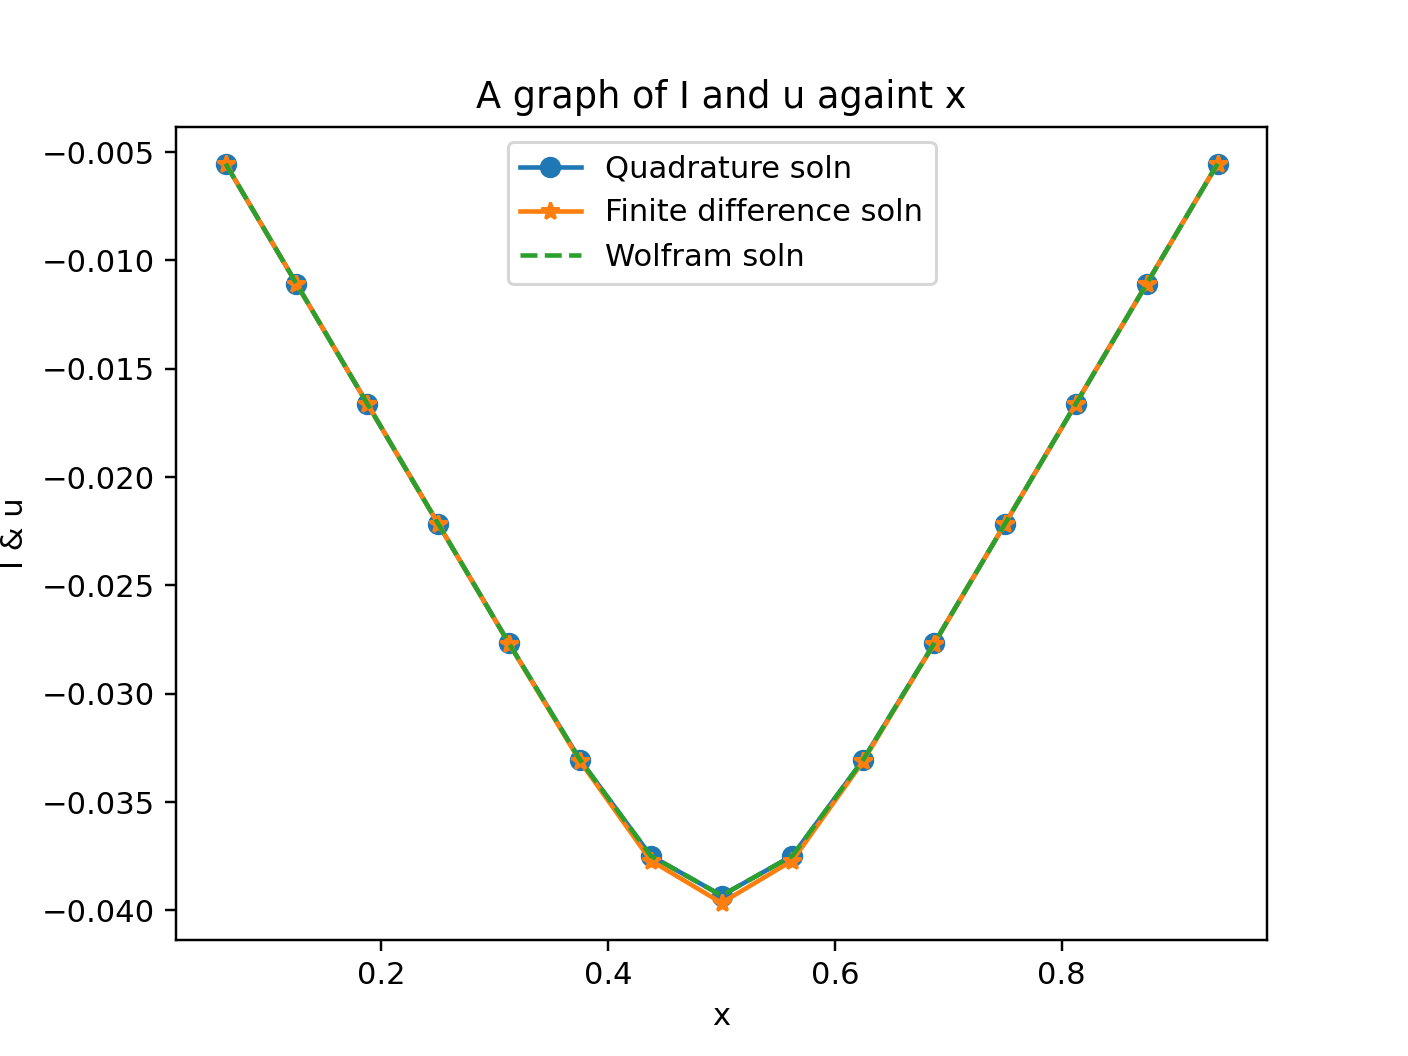

In [7]:
#ploting
figure(1)
clf()
plot(x[1:-1],I[1:-1],'-o',label='Quadrature soln')
plot(x[1:-1],u,'-*',label='Finite difference soln')
plot(x[1:-1],wolf_exact[1:-1],'--',label='Wolfram soln')
xlabel('x'); ylabel('I & u')
title('A graph of I and u againt x')
legend()
show()

What are some potential advantages/disadvantages of evaluating the integral from of the solution rather than solving the linear system arising from the finite difference approach or  the exact formulation obtained from Wolfram Alpha

__Advantages__
- We obtain the exact solution.
- computationally cheap.
- Doesn't depend on the number of iterations,N, for any value of N choosen we still get the actual solution.


__Disadvantages__
- Take long to get to close to the exact solution.
- They can't obtain solution to every problem i.e., only work for simple models.